In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


import os
%matplotlib inline

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## **Importar Datos**

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/ModelosNoSupervisados2023/main/Country-data.csv")

In [8]:
df.shape

(167, 10)

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

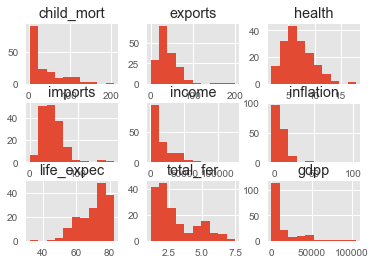

In [12]:
df.hist();

In [13]:
var=df.drop(columns=["country"]).columns.tolist()
var

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

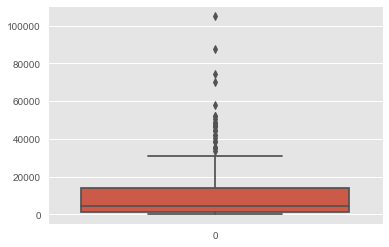

In [17]:
sns.boxplot(df[var[-1]]);

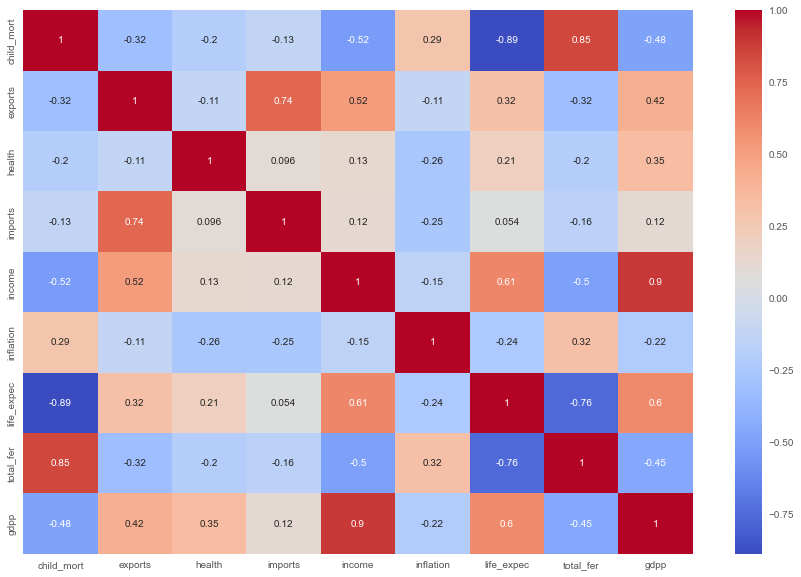

In [18]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

# **Aplicar Agrupación por Clúster K Means**

In [20]:
len(df.country.unique().tolist())

167

In [21]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df.drop("country",axis=1))

In [23]:
X_scaled_df=pd.DataFrame(X_scaled,columns=df.drop("country",axis=1).columns)

In [25]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## **Elección de K grupos?**

## **Metodo del codo**

El Método del Codo (Elbow Method en inglés) es una técnica comúnmente utilizada para determinar el número óptimo de clusters (K) en un algoritmo de agrupamiento, como K-Means. El nombre "Método del Codo" proviene de la forma de la gráfica resultante, que se asemeja a un codo o curva en el eje de las abscisas (número de clusters) y el error de agrupamiento (inercia o suma de los cuadrados internos) en el eje de las ordenadas.

In [26]:
sum_of_squared_distances = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled_df)
    sum_of_squared_distances.append(km.inertia_)

In [27]:
sum_of_squared_distances

[1050.2145582853304,
 831.4244352086874,
 700.7057359845707,
 620.1426348544958,
 551.486866933688,
 495.8333166644019,
 471.9316163112389,
 423.2340913671999,
 397.21009640805937,
 380.03629842281293,
 358.06667749651933,
 335.8362521985051,
 312.3739081586215]

In [28]:
K 

range(2, 15)

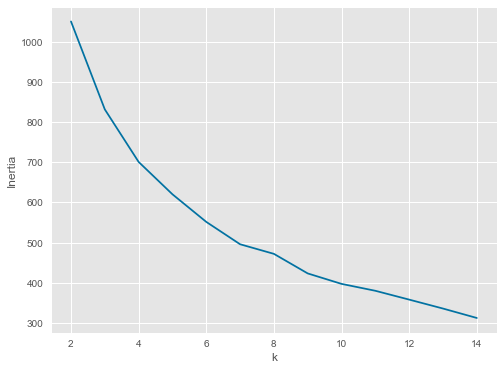

In [29]:
plt.figure(figsize=(8,6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

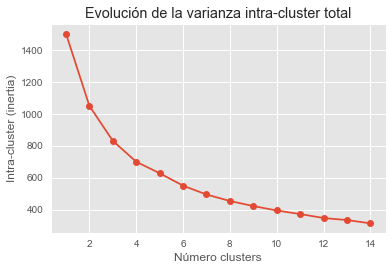

In [30]:
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled_df)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

## **Método silhouette para identificar el número óptimo de clusters**

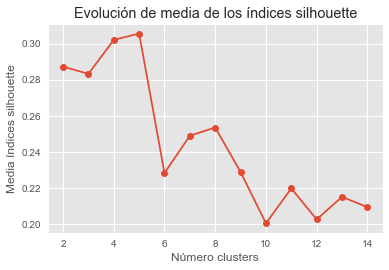

In [31]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled_df)
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

## **Seleccionamos 5 Grupos**

In [32]:
N_culster=5
kmeans = KMeans(n_clusters=N_culster).fit(X_scaled_df)
centroids = kmeans.cluster_centers_
labelsKmeans = kmeans.labels_

In [33]:
labelsKmeans

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 4, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [35]:
df["AgrupacionK_means"]=labelsKmeans

In [36]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,AgrupacionK_means
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


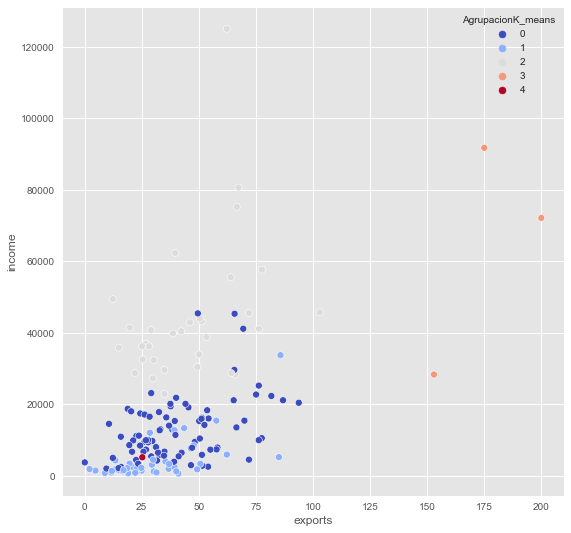

In [38]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df,  x='exports', y='income', hue= 'AgrupacionK_means', palette='coolwarm')
plt.show()

## **Evaluamos Cluster**

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=5))

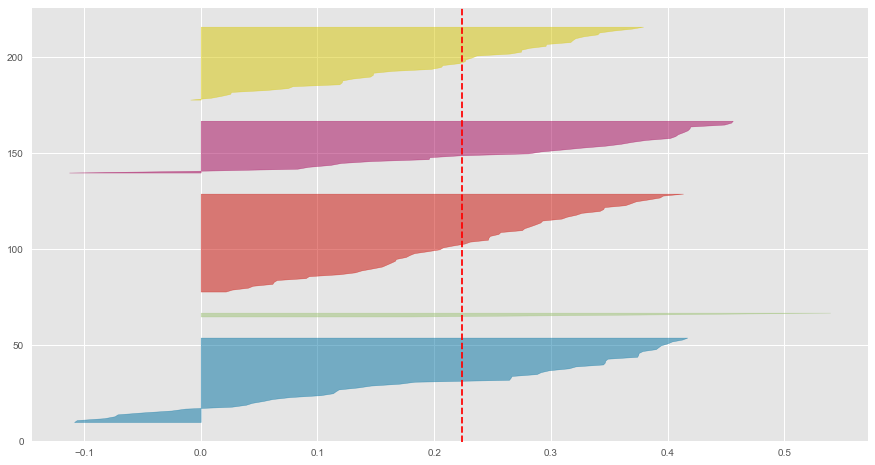

In [39]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=N_culster) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_scaled_df)

## **Identificar Valores Atípicos**

## **BDSCAN**

DBSCAN es conocido por su capacidad para identificar agrupamientos basados en la densidad de los datos en lugar de depender de la forma geométrica de los grupos. Este algoritmo puede encontrar clusters de formas arbitrarias y es robusto frente a ruido y valores atípicos.

La idea principal detrás de DBSCAN es que un cluster es una región de alta densidad de puntos separada por regiones de baja densidad. El algoritmo define los puntos centrales (core points), que son aquellos que tienen al menos un número mínimo de puntos dentro de un radio especificado. Luego, identifica puntos alcanzables desde los puntos centrales y forma clusters alrededor de ellos.

DBSCAN clasifica los puntos de datos en tres categorías: core points, border points y noise points. Core points son aquellos que pertenecen a clusters, border points están en la frontera de clusters y noise points no pertenecen a ningún cluster

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_predict = dbscan.fit_predict(X_scaled_df)

In [42]:
df["Agrupacion BDscan"]=y_predict

In [43]:
df["Agrupacion BDscan"].value_counts()

-1    167
Name: Agrupacion BDscan, dtype: int64

In [44]:
df.shape

(167, 12)

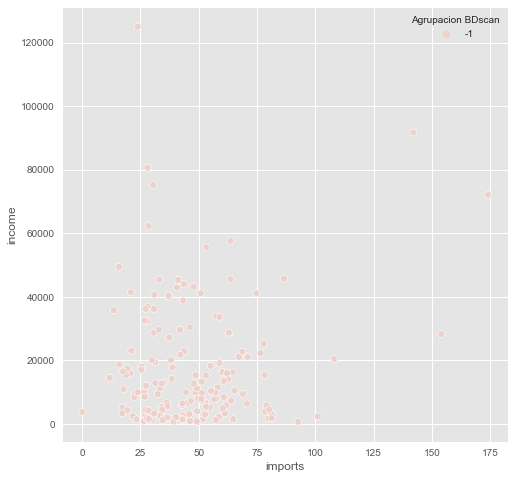

In [45]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='imports', y='income',hue='Agrupacion BDscan')
plt.plot()
plt.show()

## **Optimización**

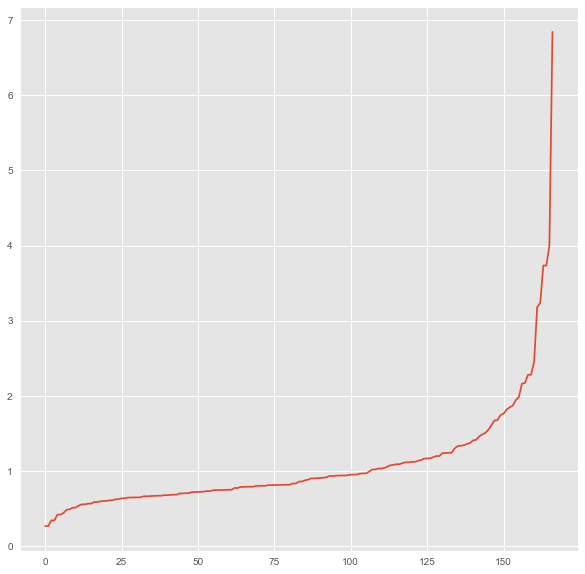

In [48]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled_df)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances,axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(10,10))
plt.plot(distances);

[]

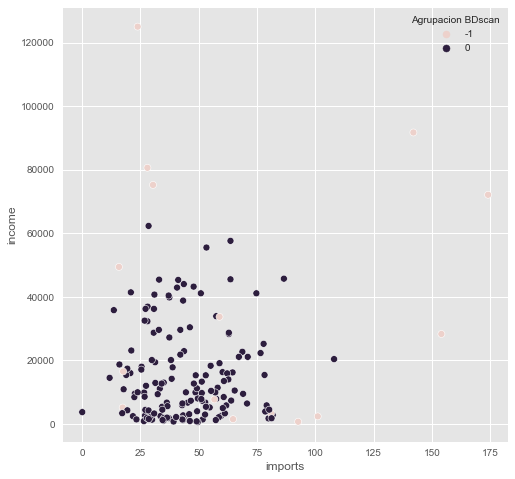

In [49]:
dbscan = DBSCAN(eps=2, min_samples=5)
y_predict = dbscan.fit_predict(X_scaled_df)
df["Agrupacion BDscan"]=y_predict

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='imports', y='income',hue='Agrupacion BDscan')
plt.plot()

In [50]:
df["Agrupacion BDscan"].value_counts()

 0    152
-1     15
Name: Agrupacion BDscan, dtype: int64

### **Optimización del min_sample**

In [51]:
from itertools import product

In [52]:
X=X_scaled_df
eps_values = np.arange(1.5, 3, 0.10) 
min_samples = np.arange(2,15)

In [53]:
dbscan_paramns = list(product(eps_values,min_samples))

In [55]:
#dbscan_paramns

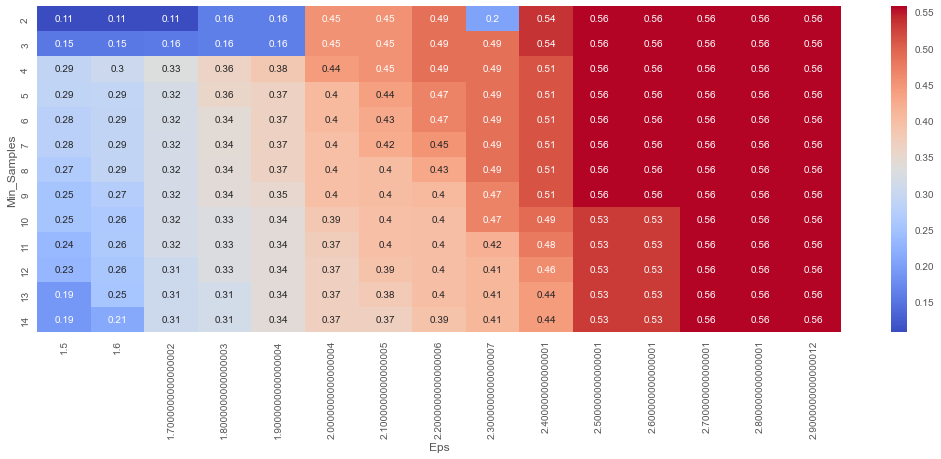

In [56]:
sil_scores = []

for p in dbscan_paramns: 
    y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X,y_pred))
    
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])
df_paramns_tunning['sil_scores'] = sil_scores

pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores',index='Min_Samples',columns='Eps')


fig, ax  = plt.subplots(figsize =(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax)
plt.show()

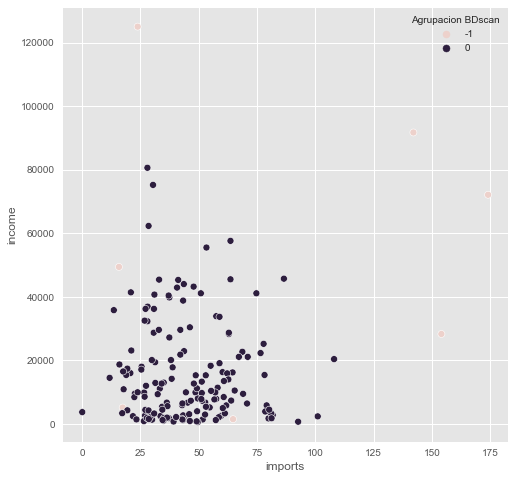

In [57]:
dbscan = DBSCAN(eps=2.40, min_samples=3)
y_predict = dbscan.fit_predict(X_scaled_df)
df["Agrupacion BDscan"]=y_predict

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='imports', y='income',hue='Agrupacion BDscan')
plt.plot()
plt.show()

In [58]:
df["Agrupacion BDscan"].value_counts()

 0    160
-1      7
Name: Agrupacion BDscan, dtype: int64

### **Paises Atípicos**

In [59]:
Atipicos=df[df["Agrupacion BDscan"]==-1]

In [60]:
Atipicos

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,AgrupacionK_means,Agrupacion BDscan
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662,1,-1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,-1
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330,4,-1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,2,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,-1
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,2,-1


In [61]:
NoAtipico=df[df["Agrupacion BDscan"]!=-1]

In [62]:
NoAtipico.shape

(160, 12)

## **No Atipicos: Se recomienda hacer zoom a este grupo**

In [63]:
NoAtipicos=df[df["Agrupacion BDscan"]==0].reset_index(drop=True)

In [64]:
NoAtipicos

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,AgrupacionK_means,Agrupacion BDscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
156,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0
157,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
158,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0


In [65]:
scaaler = StandardScaler()
X_scaled  = scaaler.fit_transform(NoAtipicos.drop(["AgrupacionK_means","country","Agrupacion BDscan"],axis=1))
X_scaled  


array([[ 1.39391375, -1.42160912,  0.30341585, ..., -1.72695782,
         1.89413533, -0.69554326],
       [-0.55845414, -0.53577534, -0.09139609, ...,  0.69230269,
        -0.87606873, -0.47467318],
       [-0.27461805, -0.02396027, -1.00367998, ...,  0.71637493,
        -0.052315  , -0.45156831],
       ...,
       [-0.380725  ,  1.62959612,  0.01976455, ...,  0.30714679,
        -0.67677348, -0.64827194],
       [ 0.49465734, -0.43734936, -0.61653429, ..., -0.36687604,
         1.13017018, -0.64827194],
       [ 1.20557391, -0.09285845, -0.34438238, ..., -2.23247494,
         1.61512197, -0.6389051 ]])

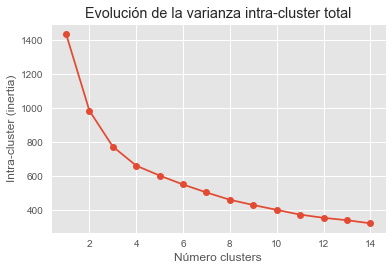

In [66]:
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

In [67]:
# Modelo
# ==============================================================================
kmeans = KMeans(n_clusters=3).fit(X_scaled)
centroids = kmeans.cluster_centers_
labelsKmeans = kmeans.labels_
NoAtipicos['ClusterKmeans'] = labelsKmeans


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3))

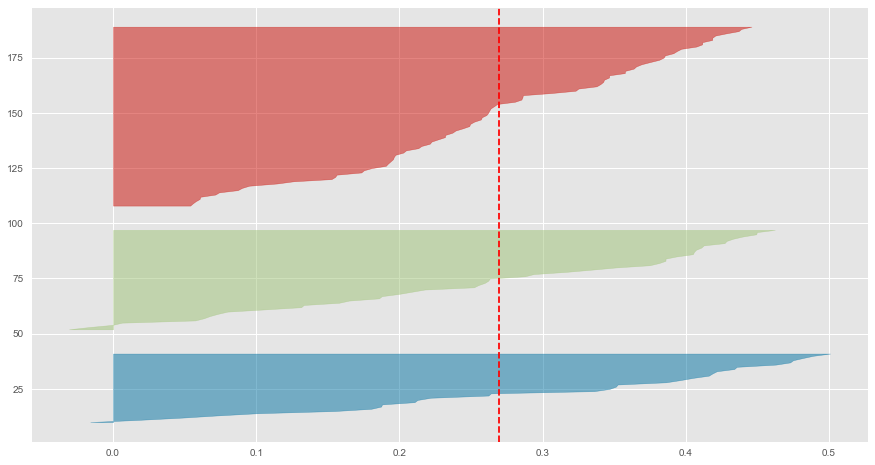

In [68]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=3) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_scaled)

In [69]:
for i in NoAtipicos.ClusterKmeans.unique().tolist():
    print("----"*150)
    print(f'Cluster {i}')
    print(NoAtipicos[NoAtipicos.ClusterKmeans==i].country.tolist())
    print(NoAtipicos[NoAtipicos.ClusterKmeans==i].describe())

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Cluster 2
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',